
# Regression


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as snsp
import pandas as pd

## Linear models

### L1 and L2 Regularization

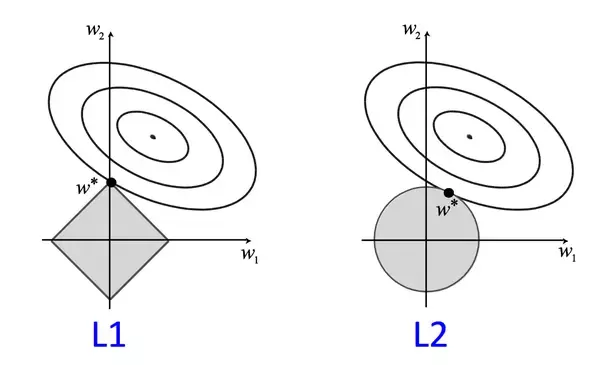

https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

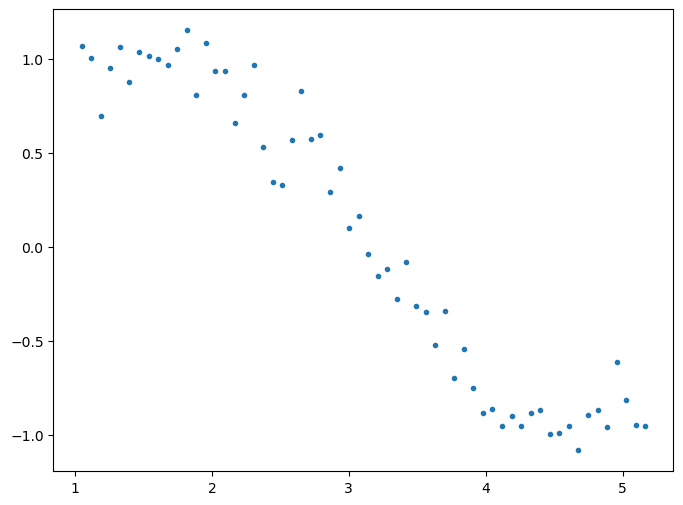

In [2]:
import random
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8,6

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')
plt.show()

In [3]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head()) 

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [4]:
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression()
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

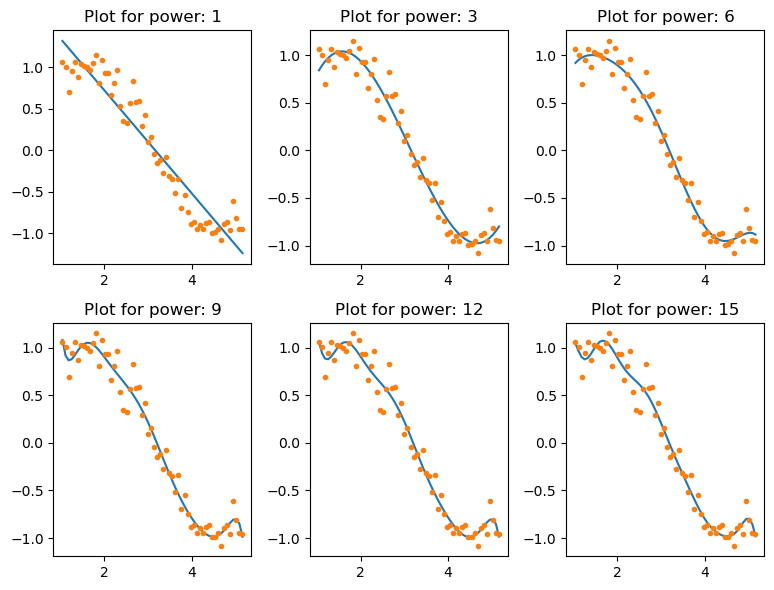

In [5]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)



In [6]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


In [7]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [8]:
data

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1,1.1,1.1,1.1,1.2,1.3,1.3,1.4,1.4,1.5,1.6,1.7,1.7,1.8,1.9,2
1,1.1,1,1.2,1.4,1.6,1.7,1.9,2.2,2.4,2.7,3,3.4,3.8,4.2,4.7,5.3
2,1.2,0.7,1.4,1.7,2,2.4,2.8,3.3,3.9,4.7,5.5,6.6,7.8,9.3,11,13
3,1.3,0.95,1.6,2,2.5,3.1,3.9,4.9,6.2,7.8,9.8,12,16,19,24,31
4,1.3,1.1,1.8,2.3,3.1,4.1,5.4,7.2,9.6,13,17,22,30,39,52,69
5,1.4,0.88,1.9,2.7,3.8,5.3,7.4,10,14,20,28,39,55,77,1.1e+02,1.5e+02
6,1.5,1,2.1,3.2,4.6,6.8,9.9,15,21,31,46,67,99,1.4e+02,2.1e+02,3.1e+02
7,1.5,1,2.4,3.6,5.6,8.5,13,20,31,48,73,1.1e+02,1.7e+02,2.6e+02,4.1e+02,6.2e+02
8,1.6,1,2.6,4.1,6.6,11,17,28,44,71,1.1e+02,1.8e+02,2.9e+02,4.7e+02,7.6e+02,1.2e+03
9,1.7,0.97,2.8,4.7,7.9,13,22,37,62,1e+02,1.7e+02,2.9e+02,4.9e+02,8.2e+02,1.4e+03,2.3e+03


/home/dzyga/miniconda3/envs/MyEnv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.32656e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/dzyga/miniconda3/envs/MyEnv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.14063e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/dzyga/miniconda3/envs/MyEnv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.68903e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/dzyga/miniconda3/envs/MyEnv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.74791e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True

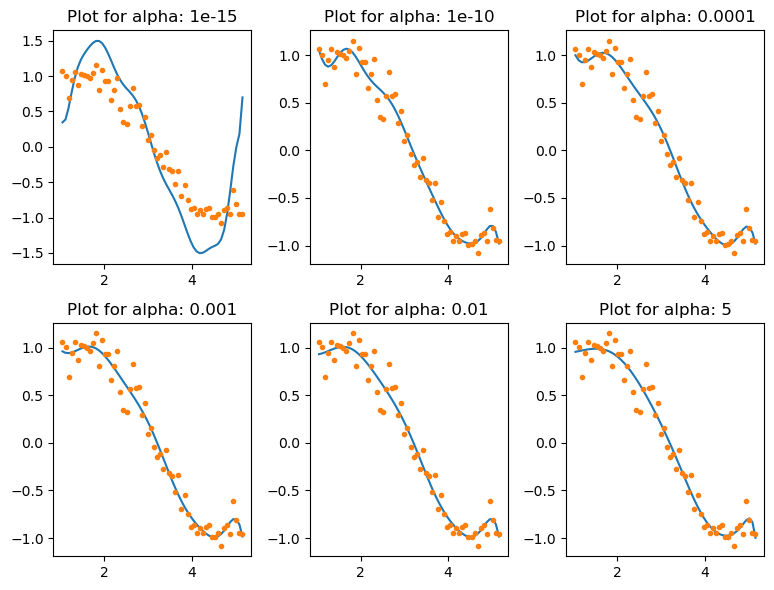

In [9]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [10]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,13,-2.8e+04,1.9e+05,-5.9e+05,1.1e+06,-1.4e+06,1.3e+06,-8.4e+05,4.2e+05,-1.6e+05,4.6e+04,-1e+04,1.6e+03,-1.9e+02,15,-0.71,0.016
alpha_1e-10,0.85,75,-6.5e+02,2e+03,-2.8e+03,1.1e+03,2e+03,-3.8e+03,3.3e+03,-1.8e+03,6.9e+02,-1.9e+02,36,-4.8,0.43,-0.023,0.00055
alpha_1e-08,0.87,-5.8,65,-1.1e+02,-9.5,1.3e+02,-49,-1.2e+02,1.8e+02,-1.2e+02,49,-13,2.5,-0.32,0.026,-0.0013,2.6e-05
alpha_0.0001,0.89,6.3,-5.9,-3.3,2.2,4,0.019,-3.6,-0.14,3.4,-2.8,1.1,-0.28,0.044,-0.0042,0.00022,-5e-06
alpha_0.001,0.91,2.6,-1.6,-1.2,0.19,1.2,0.73,-0.73,-1.4,1.9,-1,0.26,-0.028,-0.0023,0.001,-0.00011,4.5e-06
alpha_0.01,0.93,1.2,-0.31,-0.28,-0.011,0.26,0.25,-0.064,-0.28,0.0022,0.29,-0.24,0.094,-0.022,0.0029,-0.00022,7.2e-06
alpha_1,0.94,0.87,0.0073,0.018,0.027,0.027,0.012,-0.01,-0.02,-0.0021,0.017,-0.0082,0.00097,0.00033,-0.00013,1.6e-05,-7.2e-07
alpha_5,0.95,0.92,0.0035,0.0082,0.012,0.014,0.0096,0.00011,-0.0086,-0.0073,0.0038,0.0054,-0.0051,0.0018,-0.00034,3.3e-05,-1.3e-06
alpha_10,0.95,0.93,0.0025,0.0059,0.0091,0.01,0.008,0.0013,-0.0062,-0.007,0.0018,0.0064,-0.0051,0.0018,-0.00032,3e-05,-1.2e-06
alpha_20,0.95,0.95,0.0017,0.0041,0.0064,0.0075,0.006,0.0013,-0.0044,-0.0056,0.00095,0.0053,-0.0041,0.0014,-0.00025,2.3e-05,-9.1e-07


In [11]:
from sklearn import linear_model
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

In [12]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

(0.025118864315095794,
 3.9810717055349695e-11,
 -198.10222658699666,
 296.5051902131072)

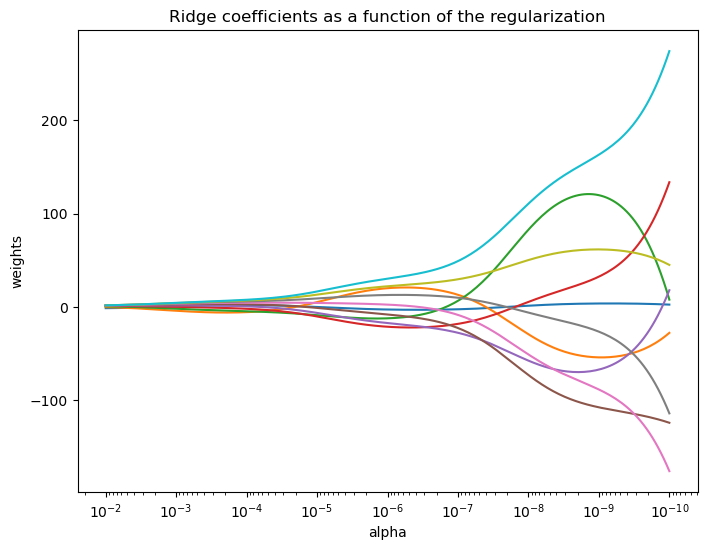

In [14]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")

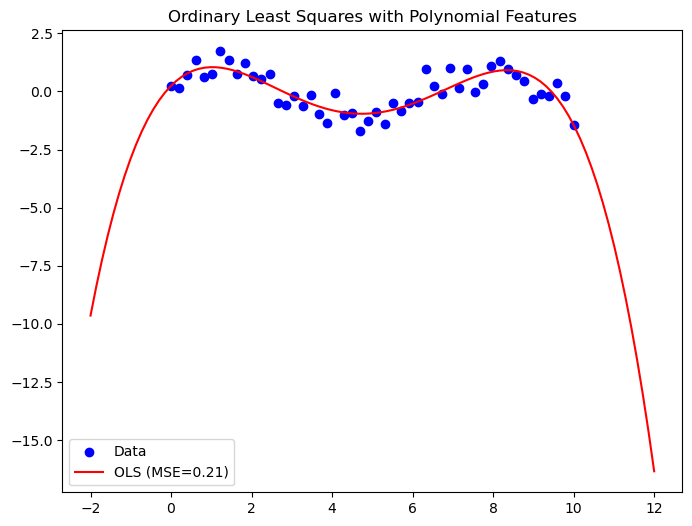

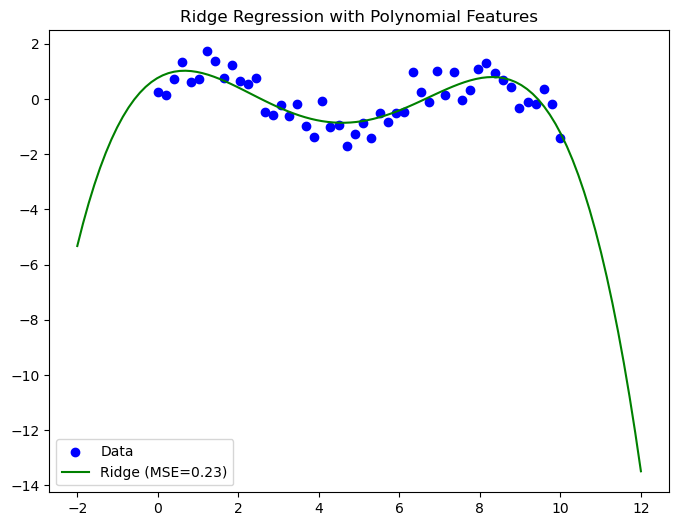

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Generate a synthetic dataset with a non-linear relationship
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = np.sin(X) + np.random.normal(0, 0.5, 50)

# Fit OLS and Ridge Regression models with polynomial features
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X.reshape(-1, 1))
ols = LinearRegression().fit(X_poly, y)
ridge = Ridge(alpha=1).fit(X_poly, y)

# Predict the output for the test data points
X_test = np.linspace(-2, 12, 100).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
ols_pred = ols.predict(X_test_poly)
ridge_pred = ridge.predict(X_test_poly)

# Compute the mean squared error on the test dataset
ols_mse = mean_squared_error(y_true=y, y_pred=ols.predict(X_poly))
ridge_mse = mean_squared_error(y_true=y, y_pred=ridge.predict(X_poly))

# Plot the data and the regression lines for OLS
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, ols_pred, color='red', label=f'OLS (MSE={ols_mse:.2f})')
plt.legend()
plt.title('Ordinary Least Squares with Polynomial Features')
plt.show()

# Plot the data and the regression lines for Ridge Regression
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, ridge_pred, color='green', label=f'Ridge (MSE={ridge_mse:.2f})')
plt.legend()
plt.title('Ridge Regression with Polynomial Features')
plt.show()


# Support vector machine: SVM 

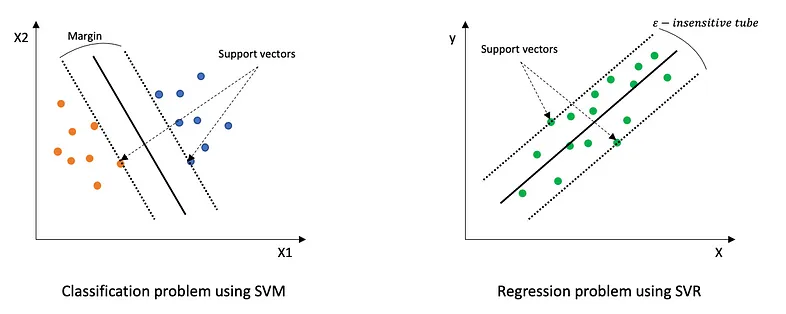

https://medium.com/@niousha.rf/support-vector-regressor-theory-and-coding-exercise-in-python-ca6a7dfda927

In [ ]:
import pandas as pd

df = pd.read_csv('data/Student_Marks.csv')
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

# train and test datasets are sorted for plotting purpose 
train = train.sort_values('time_study')
test = test.sort_values('time_study')

X_train, X_test = train[['time_study']], test[['time_study']]
y_train, y_test = train['Marks'], test['Marks']


In [ ]:
from sklearn.preprocessing import StandardScaler

### When using StandardScaler(), fit() method expects a 2D array-like input
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# X_train[:10], X_train_scaled[:10]

In [ ]:
from sklearn.svm import SVR

svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

svr_lin.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)

In [ ]:
#### Model prediction for train dataset ####
train['linear_svr_pred'] = svr_lin.predict(X_train_scaled)
train['rbf_svr_pred'] = svr_rbf.predict(X_train_scaled)
train['poly_svr_pred'] = svr_poly.predict(X_train_scaled)

#### Visualization ####
plt.scatter(train['time_study'], train['Marks'])
plt.plot(train['time_study'], train['linear_svr_pred'], color = 'orange', label = 'linear SVR')
plt.plot(train['time_study'], train['rbf_svr_pred'], color = 'green', label = 'rbf SVR')
plt.plot(train['time_study'], train['poly_svr_pred'], color = 'blue', label = 'poly SVR')
plt.legend()
plt.xlabel('Study time')
plt.ylabel('Marks')

In [ ]:
from sklearn import metrics

#### Test dataset - metrics ####
y_test_pred = svr_lin.predict(X_test_scaled)
r2_score = round(metrics.r2_score(y_test, y_test_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2)
print(f'r2: {r2_score}')
print(f'rmse: {rmse}')

In [ ]:
#### Test dataset - plot ####
y_test_pred = svr_lin.predict(X_test_scaled)
min_x = min(min(y_test_pred), min(y_test))
max_x = max(max(y_test_pred), max(y_test))
plt.scatter(y_test_pred, y_test)
plt.plot([min_x,max_x], [min_x,max_x], 'r--', label = '1:1')
plt.legend()
plt.xlabel('Prediction')
plt.ylabel('Actual')

https://medium.com/@nandiniverma78988/an-introduction-to-support-vector-regression-svr-in-machine-learning-681d541a829a

In [ ]:


# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Fit the SVR model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf.fit(X, y)

# Predict on new data points
X_test = np.linspace(0, 5, 100)[:, np.newaxis]
y_pred = svr_rbf.predict(X_test)

# Plot the results
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_test, y_pred, color='navy', lw=2, label='RBF model')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [15]:
# Use datasets from sklearn

from sklearn.datasets import load_digits
digits = load_digits()

print('Image Data Shape' , digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


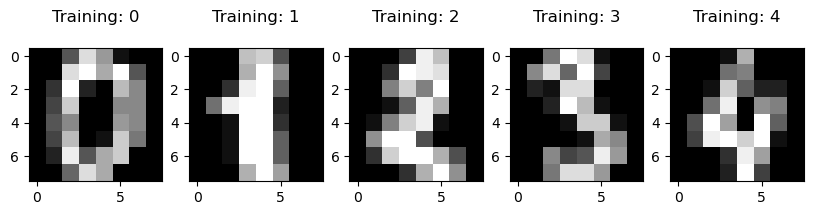

In [16]:
plt.figure(figsize=(10,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 12)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logisticRegr = LogisticRegression()

In [20]:
logisticRegr.fit(x_train, y_train)

/home/dzyga/miniconda3/envs/MyEnv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [22]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [23]:
predictions = logisticRegr.predict(x_test)

In [24]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [25]:
from sklearn import metrics

In [26]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


In [27]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

NameError: name 'sns' is not defined

<Figure size 900x900 with 0 Axes>